In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ECE5242Proj3_train_selected.load_data as ld

In [3]:
"""
Load the data
"""
# Imu
acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, imu_ts	 = ld.get_imu('ECE5242Proj3_train_selected/data/imu20')

# Encoder
FR, FL, RR, RL, enc_ts = ld.get_encoder('ECE5242Proj3_train_selected/data/Encoders20')

# Lidar
lidar = ld.get_lidar('ECE5242Proj3_train_selected/data/Hokuyo20')

### 4 Measurements for wheel speed

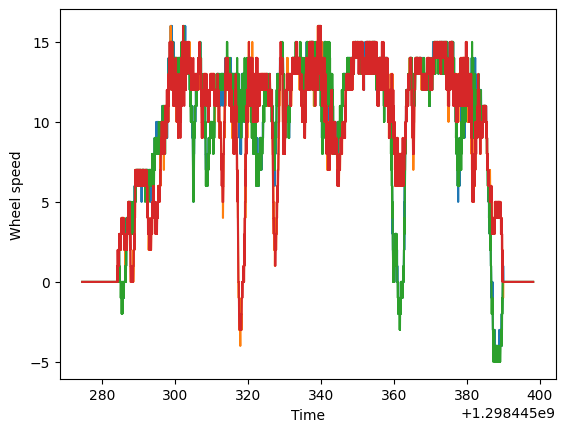

In [16]:
# Initialize figures
fig, ax = plt.subplots()

# Set axes
x = enc_ts
y1 = FR
y2 = FL
y3 = RR
y4 = RL

# Plot each data encoder np array on same plot
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)

ax.set_xlabel("Time")
ax.set_ylabel("Wheel speed")

plt.show()
plt.close()

### Distance robot moved

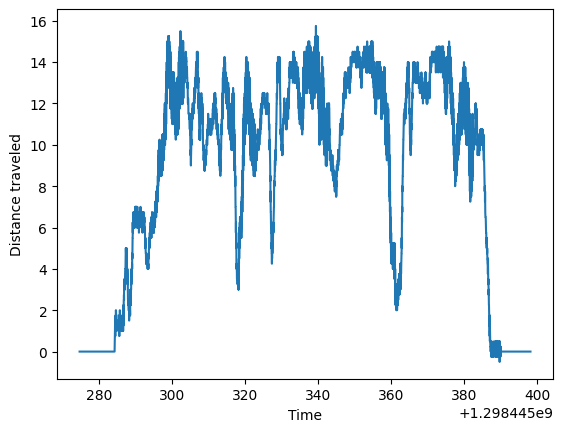

In [17]:
# Get distance traveled by taking average
avg = (FR + FL + RR + RL) / 4

# Plot the data
fig, ax = plt.subplots()
x = enc_ts
y = avg
ax.plot(x, y)
ax.set_xlabel("Time")
ax.set_ylabel("Distance traveled")
plt.show()
plt.close()

### Direction robot moves in

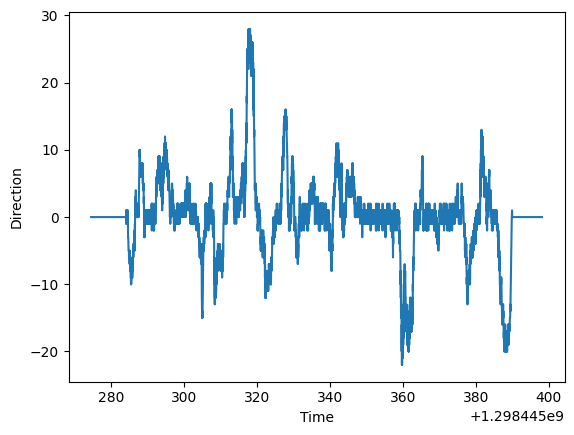

In [26]:
# Get direction traveled
direction = ((FR - FL) + (RR - RL)) # NOT SURE IF THIS IS RIGHT

# Plot the data
fig, ax = plt.subplots()
x = enc_ts
y = direction
ax.plot(x, y)
ax.set_xlabel("Time")
ax.set_ylabel("Direction")
plt.show()
plt.close()

### Orientation of robot

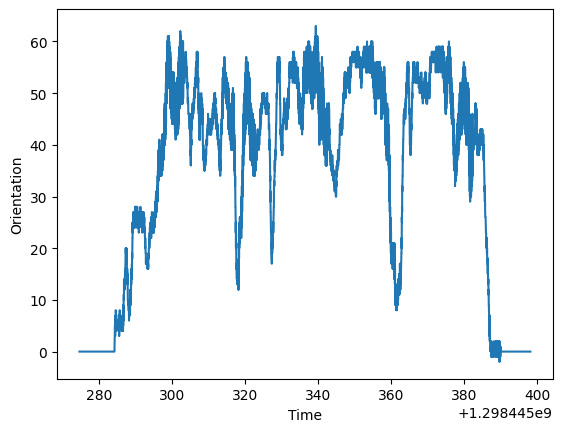

In [24]:
# Take sum of all the points
orientation = FR + FL + RR + RL

# Plot the data
fig, ax = plt.subplots()
x = enc_ts
y = orientation
ax.plot(x, y)
ax.set_xlabel("Time")
ax.set_ylabel("Orientation")
plt.show()
plt.close()

### Tracking Angular Movement

In [28]:
""" 
Cell Purpose: Calculate angular movement

Variables: 
- w: "Known width between wheels"
- e_l and e_r: "Encoder ticks"
"""
e_l = orientation * RR
e_r = orientation * RL
w = RR - RL 
angular_odometry = (e_l + e_r) / w

/var/folders/6f/4y3x4bn90jg3pjtj2dpfm_5r0000gn/T/ipykernel_1094/575180599.py:11: RuntimeWarning: divide by zero encountered in divide
  angular_odometry = (e_l + e_r) / w
/var/folders/6f/4y3x4bn90jg3pjtj2dpfm_5r0000gn/T/ipykernel_1094/575180599.py:11: RuntimeWarning: invalid value encountered in divide
  angular_odometry = (e_l + e_r) / w


### Tracking Translational Movement

In [29]:
delta_x = ((e_l + e_r) / 2) * np.cos(angular_odometry)
delta_y = ((e_l + e_r) / 2) * np.sin(angular_odometry)

/var/folders/6f/4y3x4bn90jg3pjtj2dpfm_5r0000gn/T/ipykernel_1094/2922730076.py:1: RuntimeWarning: invalid value encountered in cos
  delta_x = ((e_l + e_r) / 2) * np.cos(angular_odometry)
/var/folders/6f/4y3x4bn90jg3pjtj2dpfm_5r0000gn/T/ipykernel_1094/2922730076.py:2: RuntimeWarning: invalid value encountered in sin
  delta_y = ((e_l + e_r) / 2) * np.sin(angular_odometry)
